In [1]:

import sys
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Code'))
from Adaptive_Sampler import Adaptive_Sampler


In [21]:
# Rosenbrook saddle
def ln_prob(p,c):
    return np.log( 100 - ((c[0]-p[0])**2 + c[1]*(p[1]-p[0]**2)**2) )


In [32]:


# [height,sigma,pos]
c = [1.0,1.0]
p_guess = [1.0,1.0]


ndim = len(p_guess)

nchains = 20

start = np.empty((nchains,ndim))
for chain in range(nchains):
    start[chain] = p_guess + 0.005 * np.random.randn(ndim)



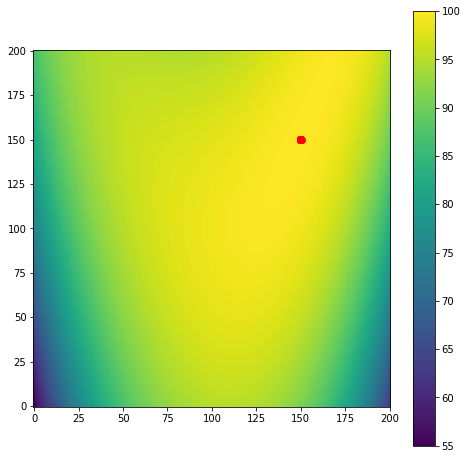

In [33]:

#
# Make an image of our probability distribution and our starting points
#

x = np.linspace(-2,2,201)
y = np.linspace(-2,2,201)
X,Y = np.meshgrid(x,y)

Z = 100 - ((c[0]-X)**2 + c[1]*(Y-X**2)**2 )

plt.figure(figsize=(8,8))
plt.imshow(Z,origin='lower')
plt.colorbar()
plt.scatter((start[:,0]+2)*200/4,(start[:,1]+2)*200/4,c='r') 


[1.0, 1.0]

R: [100. 100.]
alpha: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

R: [20.56644319 22.32843404]
alpha: [1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1]

R: [4.44405178 2.53865369]
alpha: [1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21
 1.21 1.21 1.21 1.21 1.21 1.21]


//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()



R: [22.19492702  1.9367894 ]
alpha: [1.331 1.21  1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.331 1.331 1.21  1.331 1.331 1.21  1.331]

R: [5.24468906 1.18234595]
alpha: [1.331  1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331  1.331  1.21   1.331  1.4641 1.21   1.331 ]

R: [4.58861763 1.13017487]
alpha: [1.331  1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331  1.331  1.21   1.331  1.4641 1.21   1.331 ]

R: [3.13733365 1.10400522]
alpha: [1.331  1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331  1.331  1.21   1.331  1.4641 1.21   1.331 ]

R: [3.05031318 1.08776084]
alpha: [1.331  1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331  1.331  1.21   1.331  1.4641 1.21   1.331 ]

R: [3.83538699 1.09123864]
alpha: [1.331  1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331

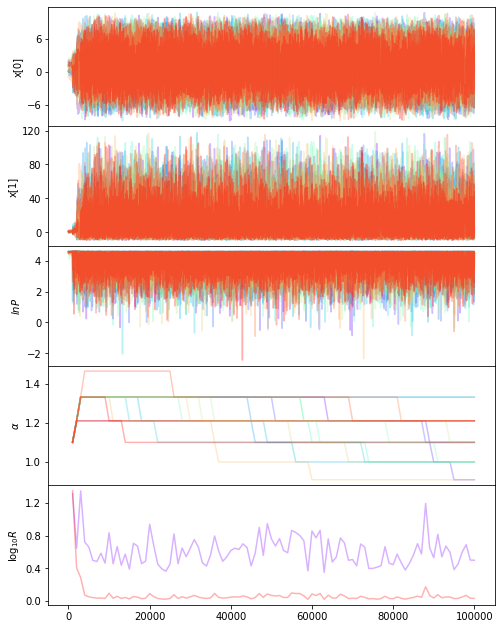

In [34]:

sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(c,))

print(p_guess)

while np.max(sampler.R) > 1.1 and sampler.iterations < 1e5:
    sampler.iterate_chains(1000,start=p_guess,scale_individual_chains=True)
    print()
    print('R:',sampler.R)
    print('alpha:', sampler.alpha)

sampler.plot_chains(plot_to_file=False)





//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


parameter means and uncertainties:
[(0.9546863655448973, 4.413110936404711, 4.458598236216235), (10.670236709653249, 26.614298638961724, 10.176762181071979)]


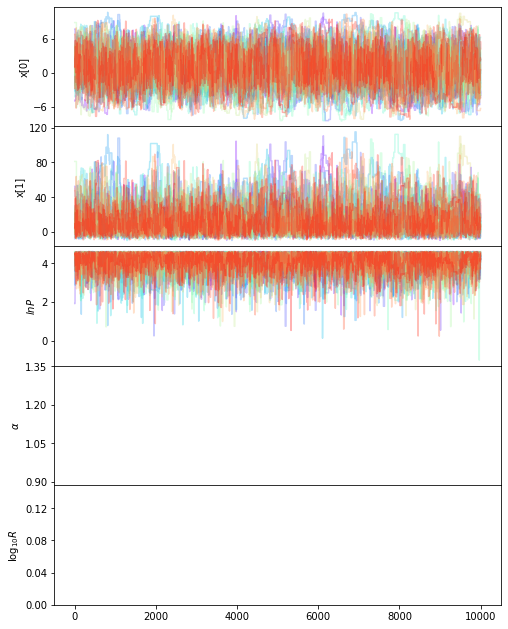

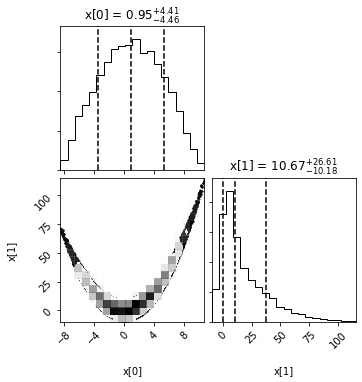

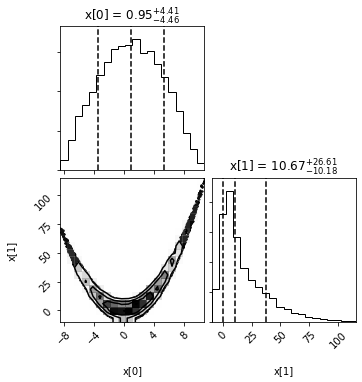

In [35]:
nsteps = 10000
sampler.reset()

sampler.iterate_chains(nsteps,scale_individual_chains=True,plot_progress=False)

sampler.plot_chains(plot_to_file=False)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
            zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
            [16, 50, 84], axis=0))))
              
print('parameter means and uncertainties:')
print(params)

              
sampler.plot_chain_corner(nsteps=nsteps,corner_kwargs={"plot_contours":False})
sampler.plot_chain_corner(nsteps=nsteps)


